In [2]:
from gensim import models
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#fichier sous la forme d'un dataframe
skipgram_model = models.KeyedVectors.load_word2vec_format("../../data/tunning/skipgramm.kv")
data = pd.DataFrame(skipgram_model.vectors)
data.index = skipgram_model.index_to_key 

X = data.values
#nombre d'observations n et de variables p
n = data.shape[0]
p = data.shape[1]

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components = 10)

pca.fit(X_scaled)
coord = pca.fit_transform(X_scaled)


10

### Analyse variance 

In [6]:
#variance expliquée
eigval = (n-1)/n*pca.explained_variance_
eigval

array([6.28337   , 1.4571143 , 0.8068522 , 0.5379165 , 0.3908389 ,
       0.308983  , 0.09966848, 0.05815904, 0.03768312, 0.01941404],
      dtype=float32)

In [7]:
#proportion de variance expliquée
prop_var=pca.explained_variance_ratio_
prop_var

array([0.62833697, 0.14571144, 0.08068522, 0.05379165, 0.03908389,
       0.0308983 , 0.00996685, 0.0058159 , 0.00376831, 0.0019414 ],
      dtype=float32)

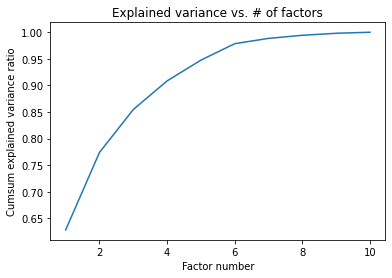

In [8]:
#cumul de variance expliquée
p=10
plt.plot(np.arange(1,p+1),np.cumsum(pca.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

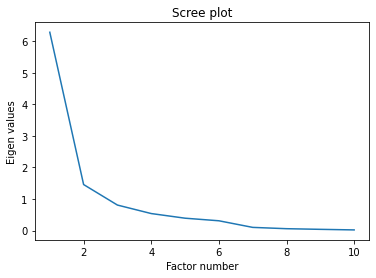

In [9]:
#scree plot
p=10
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

### on garde ??? dimensions

In [10]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components = 6)
reduc_skipgram_model = pca.fit_transform(X_scaled)

### Graphique

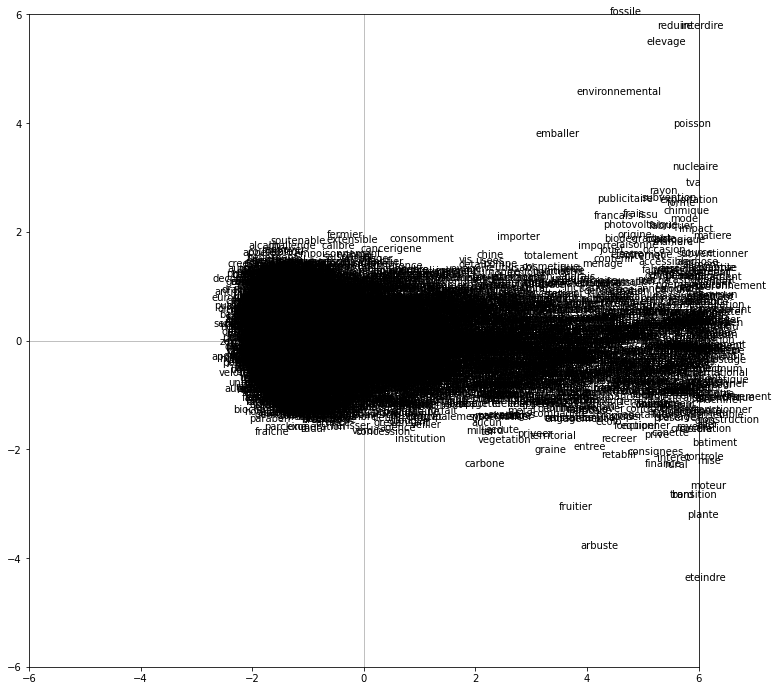

In [11]:
#Individus

#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée

#placement des étiquettes des observations
for i in range(n):
 plt.annotate(data.index[i],(reduc_skipgram_model[i,0],reduc_skipgram_model[i,1]))

#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

#affichage
plt.show()